In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('inputs\COVID-19-time-series-clean-complete.csv')

data.head(-10)

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108644,108644,2021-08-06,Turkey,5870741,51976,0.0,5818765.0,23957,101,0
108645,108645,2021-08-06,US,35695469,616493,0.0,35078976.0,254981,1173,0
108646,108646,2021-08-06,Uganda,95226,2771,0.0,92455.0,322,19,0
108647,108647,2021-08-06,Ukraine,2341399,55792,0.0,2285607.0,1668,37,0


In [4]:
april_data = data.query('Date>="2020-04-01" and Date<"2020-05-01"').reset_index(drop=True)

april_data.head()

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0
1,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15
2,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15
3,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0
4,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0


In [5]:
patients = april_data.groupby('CountryRegion')['Active'].max().reset_index()
patients = patients.sort_values(by="Active", ascending=False).reset_index(drop=True)

patients.head(8)

,CountryRegion,Active
0,US,867177.0
1,United Kingdom,151158.0
2,Italy,108257.0
3,Spain,101617.0
4,France,98578.0
5,Russia,93806.0
6,Turkey,80808.0
7,Germany,72864.0


In [6]:
iran_data = data.query('CountryRegion == "Iran"').reset_index(drop=True)
iran_data['Date'] = pd.to_datetime(iran_data['Date'])

iran_data['YearMonthDate'] = iran_data['Date'].map(lambda date: 100*date.year + date.month)

death = iran_data.groupby(['YearMonthDate'])['New deaths'].sum().reset_index()

death

,YearMonthDate,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


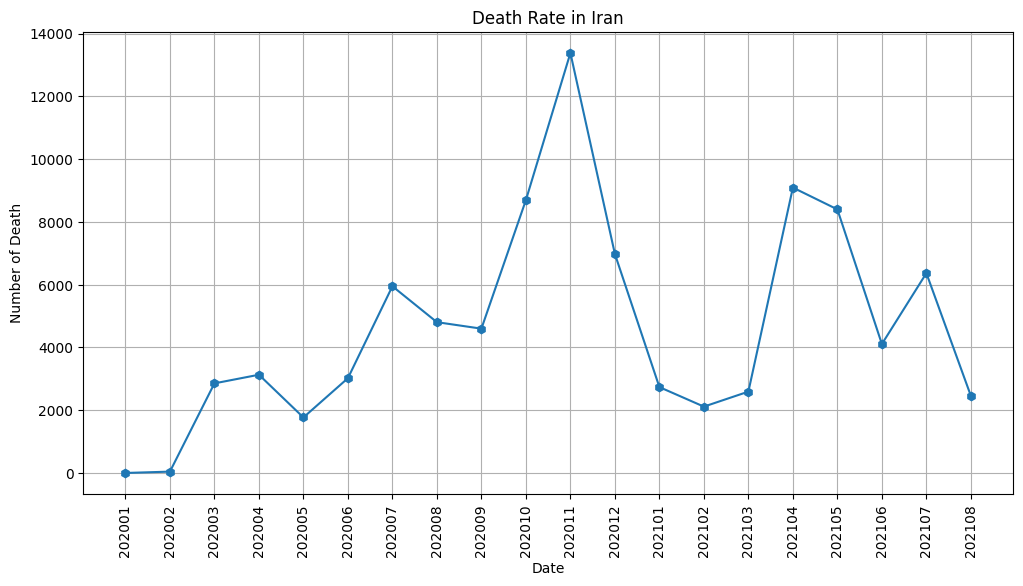

In [8]:
plt.figure(figsize=(12,6))
plt.plot(death['YearMonthDate'].to_numpy(dtype=str), death['New deaths'].to_numpy(), marker='h')

plt.xticks(rotation='vertical')
plt.title('Death Rate in Iran')
plt.xlabel('Date')
plt.ylabel('Number of Death')
plt.grid()
plt.savefig('outputs/death_rate.png', dpi=200)
plt.show()